# Effect Size 

## Introduction

When comparing results between groups, and results prove to be different, it is important to understand what the size of the difference is. You'll learn about that here!

## Objectives

* Illustrate a clear understanding of the terms "Effect" and "Effect Size" in a statistical context
* Compare and contrast p-value and effect size for identifying significance of results
* Calculate simple (unstandardized) effect size using Python and SciPy
* Interpret results of simple effect size and identify shortcomings of this approach
* Calculate standardized effect size using Cohen's d statistic
* Visualize and Interpret the $d$ value as size of effect

## Introduction to Effect Size

Effect size is used to quantify the *size of the difference* between two groups under observation. Effect sizes are easy to calculate, understand and apply to any measured outcome and are applicable to a multitude of study domains. It is highly valuable towards quantifying the *effectiveness of a particular intervention, relative to some comparison*. Measuring effect size allows scientists to go beyond the obvious and simplistic *'Does it work or not?'* to the far more sophisticated, *'How well does it work in a range of contexts?'*. 

[More on effect size](https://www.slideshare.net/gaetanlion/effect-size-presentation)



### P-value vs. Effect Size

Effect size measurement places its emphasis on the effect size only, unlike statistical significance which combines effect size and sample size, thus promoting a more scientific approach towards knowledge accumulation. Effect size is therefore routinely used towards **Meta-Analysis** i.e. for combining and comparing estimates from different studies conducted on different samples. 

By increasing sample size, you can show there is a statistically significant difference between two means. However, **statistically significant does not necessarily imply “significant."**.

>**P value** = probability sample means are the same.

>(1 – P) or **Confidence Level** = probability sample means are different.

>**Effect Size** = how different sample means are


In light of this, it is possible to achieve highly significant p-values for effect sizes that have no practical significance. In contrast, study designs with low power can produce non-significant p-values for effect sizes of great practical importance.

[Further details on p-value vs. effect size calculation](http://www.win-vector.com/blog/2017/09/remember-p-values-are-not-effect-sizes/)

## Why do data scientists need to know about 'Effect Size'?

Consider the experiment conducted by Dowson (2000) to investigate time of day effects on children learning: do children learn better in the morning or afternoon? A group of 38 children was included in the experiment. Half were randomly allocated to listen to a story and answer questions about it at 9am, the other half heard exactly the same story and had to answer the same questions at 3pm. Their comprehension was measured by the number of questions answered correctly out of 20.

The average score was 15.2 for the morning group and 17.9 for the afternoon group, giving a difference of 2.7. 
**How big a difference is this? **

If the results were measured on a standard scale, such as a 4 point GPA scale, interpreting the difference would not be a problem. If the average difference was, say, half a grade or a full grade, most people would have a fair idea of the educational significance of the effect of reading a story at different times of the day. However, in many experiments, there is no familiar scale available on which to record the outcomes i.e. student comprehension in this case. The experimenter often has to invent a scale or use (or adapt) an already existing one - but generally, most people would be unfamiliar with the interpretation of this scaler.

In a data analytics domain, effect size calculation serves three primary goals:

* Communicate **practical significance** of results. An effect might be statistically significant, but does it matter in practical scenarios?

* Effect size calculation and interpretation allows you to draw **Meta-Analytical** conclusions. This allows you to group together a number of existing studies, calculate the meta-analytic effect size and get the best estimate of the tur effect size of the population. 

* Perform **Power Analysis**, which help determine the number of participants (sample size) that a study requires to achieve a certain probability of finding a true effect - if there is one. 


## Calculating effect size in Python 

### Using SciPy for measuring effect size

SciPy (pronounced “Sigh Pie”) is open-source software for mathematics, science, and engineering. The SciPy package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc. For an experiment, you can use `scipy.stats` package which contains statistical tools and probabilistic descriptions of random processes. Detailed documentation of SciPy is available [here](https://docs.scipy.org/doc/scipy/reference/index.html). 

In [1]:
# Import necessary modules 
from __future__ import print_function, division
import numpy as np

# Import SciPy stats and matplotlib for calculating and visualising effect size
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline

# seed the random number generator so we all get the same results
np.random.seed(10)

### Example: 
To explore statistics that quantify effect size, let's first look at the difference in height between men and women in the USA, based on the mean and standard deviation for male and female heights as given in (BRFSS) Behavioral Risk Factor Surveillance System.

>**Males Height**  (Mean = 178 , Standard Deviation = 7.7)

>**Female Height** (Mean = 163 , Standard Deviation = 7.3)

You can use `scipy.stats.norm()` to represent the height distributions by passing mean and standard deviation values as arguments for creating normal distribution. 

In [2]:
#Mean height and sd for males
male_mean = 178
male_sd = 7.7

# Generate a normal distribution for male heights 
male_height = scipy.stats.norm(male_mean, male_sd)

 The result `male_height` is a SciPy `rv` object which represents a **normal continuous random variable**. 

In [3]:
male_height

Use the mean and standard deviation for female height and repeat calculations shown above to calculate `female_height` as an `rv` object.

In [4]:
female_mean = 163
female_sd = 7.3
female_height = scipy.stats.norm(female_mean, female_sd)

##  Evaluate Probability Density Function (PDF)

A continuous random variable, as calculated above, takes on an uncountably infinite number of possible values. 

For a **discrete** random variable X that takes on a finite or infinite number of possible values, we determine P(X = x) for all of the possible values of X and call it the probability mass function (PMF). 

For **continuous** random variables, as in the case of heights, the probability that X takes on any particular value x is 0. That is, finding P(X = x) for a continuous random variable X is not going to work. Instead, you'll need to find the probability that X falls in some interval (a, b) i.e. you'll need to find **P(a < X < b)** using a **probability density function(PDF)**. 


The following function evaluates the normal (Gaussian) probability density function within 4 standard deviations of the mean. The function ingests an rv object and returns a pair of NumPy arrays.

In [5]:
def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
       output : x and y values for the normal distribution
       '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

Let's use the function above to calculate xs and ys for male and female heights (pass the `rv` object as an argument) and plot the resulting xs and ys for both distributions to visualize the effect size.**  

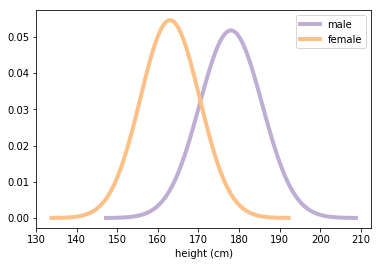

In [7]:
# Male height
xs, ys = evaluate_PDF(male_height)
plt.plot(xs, ys, label='male', linewidth=4, color='#beaed4') 

#Female height 
xs, ys = evaluate_PDF(female_height)
plt.plot(xs, ys, label='female', linewidth=4, color='#fdc086')

plt.xlabel('height (cm)')
plt.legend()


Let's assume for the sake of simplicity that these are the true distributions for the population. As you studied earlier, in real life one would never observe the true population distribution.  You generally have to work with a random sample. Let's try to work out how different these two groups are with respect to height by calculating un-standardized and standardized effect sizes.



## Un-standardized or Simple Effect Size Calculation

An unstandardized effect size simply tries to find the difference between two groups by calculating the difference between distribution means. Here is how you can do it in python. 

You can use the `rvs` method from `scipy.stats` to generate a random sample of size 1000 from the population distributions.  Note that these are totally random and representative samples, with no measurement error.


Visit [this link](https://docs.scipy.org/doc/scipy-1.0.0/reference/tutorial/stats.html) for more details on `sciPy.stats`. 

In [10]:
male_sample = male_height.rvs(1000)

The resulting samples are numPy arrays, so we can now easily calculate the mean and sd of random samples. 

In [11]:
mean1, std1 = male_sample.mean(), male_sample.std()
mean1, std1
# (177.88791390576085, 7.222274730410271)

(177.837885058788, 7.732798513254416)

The sample mean is close to the population mean, but not exact, as expected.

Let's perform above calculation for female heights to calculate mean and sd of random samples from `female_height` `rv` object**

In [12]:
female_sample = female_height.rvs(1000)
mean2, std2 = female_sample.mean(), female_sample.std()
mean2, std2
# (162.91903182040372, 7.261850929417819)

(162.58026392826508, 7.414296009024322)

And the results are similar for the female sample.

Now, there are many ways to describe the magnitude of the difference between these distributions. An obvious one is the difference in the means. 

Now, calculate the difference in means of both distributions identified above.**

In [13]:
difference_in_means = male_sample.mean() - female_sample.mean()
difference_in_means # in cm
# 14.968882085357137

15.25762113052292

This shows that on average, men are around 15 centimeters taller. For some applications, that would be a good way to describe the difference, but there are caveats:

* Without knowing more about the distributions (like the standard deviations or _spread_ of each distribution) it's hard to interpret whether a difference like 15 cm is a **big difference** or not.

* The magnitude of the difference depends on the units of measure, making it hard to compare across different studies that may be conducted with different units of measurement.

There are a number of ways to quantify the difference between distributions.  A simple option is to express the difference as a percentage of the mean.


Let's figure out the relative difference in the means of two populations, scaled by the mean of male heights and  expressed as a percentage. 

In [14]:
relative_difference = difference_in_means / male_sample.mean()
relative_difference * 100   # percent

#  8.414783082614122

8.5795111235602

But a problem with relative differences is that you have to choose which mean to express them relative to.

In [15]:
relative_difference = difference_in_means / female_sample.mean()
relative_difference * 100    # percent

# 9.18792722869745

9.384669923561574

## Overlap threshold

As you can see above, there is still a difference in results when you express the relative difference, depending on whether we choose to represent the ratio relative to male height or female height. Perhaps you can look for the amount of overlap between the two distributions.  To define overlap, you choose a threshold between the two means.  The simple threshold is the midpoint between the means:

In [16]:
simple_thresh = (mean1 + mean2) / 2
simple_thresh

170.20907449352654

A better, but slightly more complicated threshold is the place where the PDFs cross.

In [17]:
thresh = (std1 * mean2 + std2 * mean1) / (std1 + std2)
thresh

170.04866120332366

In this example, there's not much difference between the two thresholds.
Now you can count how many men are below the threshold:

In [18]:
male_below_thresh = sum(male_sample < thresh)
male_below_thresh

166

Similarly, you can calculate how many women are above the calculated threshold

In [19]:
female_above_thresh = sum(female_sample > thresh)
female_above_thresh

173

Now, take a look at what these thresholds look like when laid over the Probability Density Functions of both samples' distributions.

Text(0.5, 0, 'height (cm)')

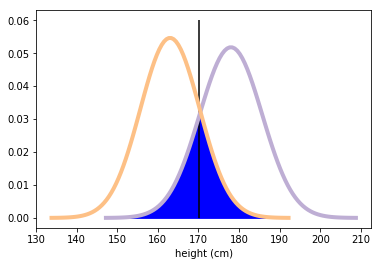

In [20]:
# Male height
m_xs, male_ys = evaluate_PDF(male_height)
plt.plot(m_xs, male_ys, label='male', linewidth=4, color='#beaed4') 

#Female height 
f_xs, female_ys = evaluate_PDF(female_height)
plt.plot(f_xs, female_ys, label='female', linewidth=4, color='#fdc086')
plt.vlines(thresh,ymin=0,ymax=0.06)
plt.fill_betweenx(male_ys,x1 = m_xs,x2=thresh, where = m_xs < thresh,color='b')
plt.fill_betweenx(female_ys,x1=f_xs,x2=thresh, where = f_xs > thresh,color='b')
plt.xlabel('height (cm)')

The "overlap" (shaded region above) is the total **AUC (Area Under the Curves)**. We can use this to identify the sample that end up on the wrong side of the threshold. We can calculate the amount of overlap as shown below. 

In [21]:
# Calculate the overlap 
overlap = male_below_thresh / len(male_sample) + female_above_thresh / len(female_sample)
overlap

0.33899999999999997

Or in more practical terms, you might report the fraction of people who would be misclassified if you tried to use height to guess sex:

In [22]:
misclassification_rate = overlap / 2
misclassification_rate

0.16949999999999998

## Probability of superiority (Non-parametric)

Another "non-parametric" way to quantify the difference between distributions is what's called **"probability of superiority"**, which is the probability that *"a randomly-chosen man is taller than a randomly-chosen woman"*, which makes perfect sense.

> Question: If we choose a male and a female sample at random, what is the probability that males are taller than females? 

In [23]:
# Python zip() The zip() function take iterables (can be zero or more), 
# makes iterator that aggregates elements based on the iterables passed, 
# and returns an iterator of tuples.

sum(x > y for x, y in zip(male_sample, female_sample)) / len(male_sample)

0.94

> Question: If we choose a female and a male sample at random, what is the probability that females are smaller than males in height? Is it different/same as above? **

In [24]:
sum(x < y for x, y in zip(female_sample, male_sample)) / len(female_sample)

0.94

Overlap (or misclassification rate) as shown above and "probability of superiority" have two good properties:

* As probabilities, they don't depend on units of measure, so they are comparable between studies.

* They are expressed in operational terms, so a reader has a sense of what practical effect the difference makes.

There is one other common way to express the difference between distributions (i.e. the difference in means) standardizing by dividing by the standard deviation.



Here's a function that encapsulates the code we have already seen for computing overlap and probability of superiority.

In [25]:
def overlap_superiority(group1, group2, n=1000):
    """Estimates overlap and superiority based on a sample.
    
    group1: scipy.stats rv object
    group2: scipy.stats rv object
    n: sample size
    """

    # Get a sample of size n from both groups
    group1_sample = group1.rvs(n)
    group2_sample = group2.rvs(n)
    
    # Identify the threshold between samples
    thresh = (group1.mean() + group2.mean()) / 2
    print(thresh)
    
    # Calculate no. of values above and below for group 1 and group 2 respectively
    above = sum(group1_sample < thresh)
    below = sum(group2_sample > thresh)
    
    # Calculate the overlap
    overlap = (above + below) / n
    
    # Calculate probability of superiority
    superiority = sum(x > y for x, y in zip(group1_sample, group2_sample)) / n

    return overlap, superiority

In [26]:

overlap_superiority(male_height, female_height, n=1000)

170.5


(0.319, 0.915)

## Standardized effect size

When analysts generally talk about effect sizes, they refer to some method of calculating a *standardized* effect size. The standardized effect size statistic would divide effect size by some standardizer i.e. standard deviation:

>**Effect Size / Standardiser**

When interpreting, this statistic would be in terms of standard deviations e.g. The mean height of males in USA is 1.4 standard deviations higher than mean female heights etc. The effect size measure you will be learning about in this lesson is Cohen’s d. This measure expresses the size of an effect in terms of the number of standard deviations, similar to a z-score in statistics.

In [24]:
## not covered yet
"Cohen’s d is similar to the unpaired t test t value. It relies on Standard Deviations instead of Standard Errors"


'Cohen’s d is similar to the unpaired t test t value. It relies on Standard Deviations instead of Standard Errors'

## Cohen's $d$

Cohen’s D is one of the most common ways to measure effect size.  As an effect size, Cohen's d is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable. 

The basic formula to calculate Cohen’s $d$ is:

> ** $d$ = effect size (difference of means) / pooled standard deviation **

The denominator is the **standardiser**, and it is important to select the most appropriate one for a given dataset. The pooled standard deviation is the average spread of all data points around their group mean (not the overall mean). 

In [27]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

Computing the denominator is a little complicated; in fact, people have proposed several ways to do it.  [Here](https://scientificallysound.org/2017/07/13/cohens-d-standardiser/) is a brief description of using standardisers while calculating Cohen's $d$ for standard effect sizes.  

This implementation uses the "pooled standard deviation," which is a weighted average of the standard deviations of the two groups.

And here's the result for the difference in height between men and women.

In [28]:
Cohen_d(male_sample, female_sample)

2.0141485441714555

## Interpreting $d$
Most people don't have a good sense of how big $d=2.0$ is. If you are having trouble visualizing what the result of Cohen’s D means, use these general “rule of thumb” guidelines (which Cohen said should be used cautiously):

>**Small effect = 0.2**

>**Medium Effect = 0.5**

>**Large Effect = 0.8**

Here is an excellent online visualization tool developed by [Kristoffer Magnusson](https://rpsychologist.com/d3/cohend/) to help interpret the results of cohen's $d$ statistic. 

Following function that takes Cohen's $d$, plots normal distributions with the given effect size, and prints their overlap and superiority.

In [29]:
def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = scipy.stats.norm(0, 1)
    group2 = scipy.stats.norm(cohen_d, 1)
    xs, ys = evaluate_PDF(group1)
    plt.fill_between(xs, ys, label='Group1', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    plt.fill_between(xs, ys, label='Group2', color='#376cb0', alpha=0.7)
    
    o, s = overlap_superiority(group1, group2)
    print('overlap', o)
    print('superiority', s)

Here's an example that demonstrates the function:

0.25
overlap 1.19
superiority 0.358


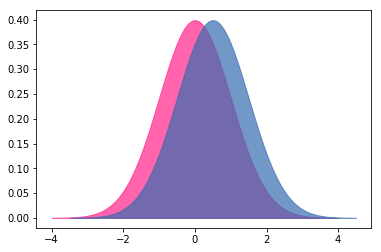

In [31]:
plot_pdfs(.5)
# Try changing the d value and observe the effect on the outcome below

Cohen's $d$ has a few nice properties:

* Because mean and standard deviation have the same units, their ratio is dimensionless, so you can compare $d$ across different studies.

* In fields that commonly use $d$, people are calibrated to know what values should be considered big, surprising, or important.

* Given $d$ (and the assumption that the distributions are normal), you can compute overlap, superiority, and related statistics.

## Summary

In this lesson, we highlighted the importance of calculating and interpreting effect size in Python as a measure of observing real world difference between two groups. You learned about simple (unstandardized) effect size calculation as difference of means, as well as standardization of this calculation with standard deviation as a standardizer. You also learned what is Cohen's d statistic and how to use it for practical purposes. The best way to report effect size often depends on the audience, goals, and subjects of study.  There is often a tradeoff between summary statistics that have good technical properties and statistics that are meaningful to a general audience.